# Интерполационна формула на Нютон. Някои практически въпроси, свързани с интерполацията.

### Задача 1

Да се напише функция _divided_difference(nodes, values)_, където _nodes_ е списък с точки от реалната права, а _values_ -- списък с реални стойности. Функцията да изчислява разделената разлика на функция със стойности _values_ в точките _nodes_.

In [2]:
# Recursive divided difference
def div_diff(nodes, values):
    n = len(nodes)
    if n == 1:
        return values[0]
    #      from 1 to n - 1                    from 0 to n - 2                         n - 1         
    return (div_diff(nodes[1:n], values[1:n]) - div_diff(nodes[0:n-1], values[0:n-1])) / (nodes[n-1] - nodes[0])

### Задача 2
Да се напише функция *newton_poly(nodes, values, x)*, която връща стойността на интерполационния полином на Лагранж, с възли _nodes_ и съответни стойности _values_ в т. _x_.

In [3]:
def newton_poly(nodes, values, x):
    n = len(nodes)
    poly = 0
    prod = 1
    for i in range(n):
        poly += div_diff(nodes[0:i+1], values[0:i+1]) * prod
        prod *= (x - nodes[i])
        
    return poly

### Задача 3
В таблицата са дадени данни за населението на САЩ в периода 1920-1990. Да се построи
полином от седма степен, интерполиращ таблицата. Да се даде приближение на населението
през 1952, 1974, 2000 година и да се сравни с действителните стойности --
съответно 157 млн., 214 млн., 281.42 млн.


| Година| 1920 | 1930 | 1940 | 1950 | 1960 | 1970 | 1980 | 1990 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Население | 106.46 | 123.08 | 132.12 | 152.27 | 180.67 | 205.05 | 227.23 | 249.46 |


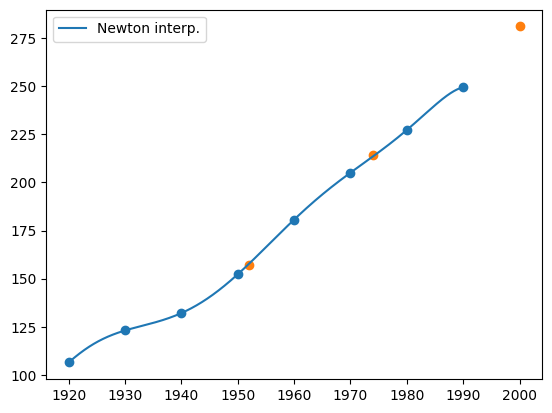

In [4]:
import numpy as np
import matplotlib.pyplot as plt

nodes = np.array([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990])
values = np.array([106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46])
x_vals = np.linspace(1920, 1990, 2000)

plt.plot(x_vals, newton_poly(nodes, values, x_vals), label="Newton interp.")
plt.scatter(nodes, values)
plt.scatter([1952, 1974, 2000], [157, 214, 281])
plt.legend()
plt.show()

In [5]:
print(newton_poly(nodes, values, 1952))

157.72802626559996


In [6]:
print(newton_poly(nodes, values, 1974))

213.51053127680007


In [7]:
#extrapolation expected to fail and fails, nice
print(newton_poly(nodes, values, 2000))

175.08000000000226


### Задача 4

Дадена е функцията на Рунге $ f(x)=\dfrac{1}{1+25x^2}$. Да се приближи $ f(x) $ в интервала $x \in [-1,1],$ като се използват интерполационни полиноми от степени 10 и 4 с равноотдалечени възли. 
Да се построят графиките на всеки от полиномите, заедно с графиката на функцията в една координатна система, както и графиките на абсолютната грешка по модул в двата случая.


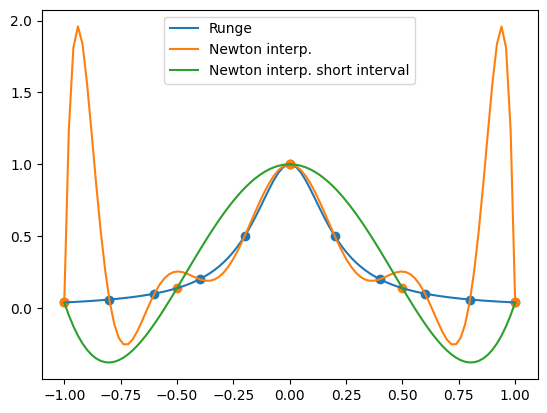

In [8]:
def f(x):
    return 1/(1 + 25*x**2)

interval = np.linspace(-1, 1, 100)
intervalTen = np.linspace(-1, 1, 11)
intervalFour = np.linspace(-1, 1, 5)

plt.plot(interval, f(interval), label="Runge")
plt.plot(interval, newton_poly(intervalTen, f(intervalTen), interval), label="Newton interp.")
plt.scatter(intervalTen, f(intervalTen))
plt.plot(interval, newton_poly(intervalFour, f(intervalFour), interval), label="Newton interp. short interval")
plt.scatter(intervalFour, f(intervalFour))
plt.legend()
plt.show()

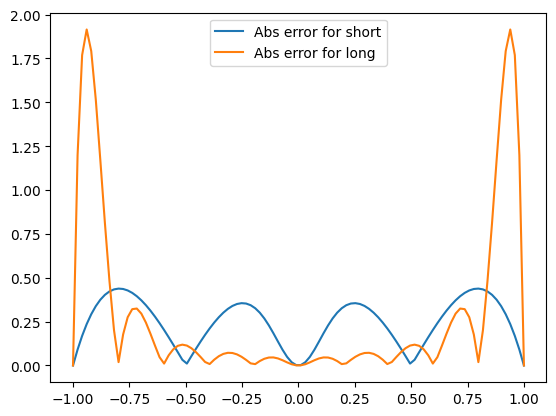

In [9]:
def abs_err(x):
    return abs(f(interval) - newton_poly(x, f(x), interval))

plt.plot(interval, abs_err(intervalFour), label="Abs error for short")
plt.plot(interval, abs_err(intervalTen), label="Abs error for long")
plt.legend()
plt.show()

### Задача 5

Известно е (вж. лекции), че най-добрите възли за интерполация в интервала $[-1,1]$ са т.нар. Чебишови възли, които се задават по формулата:

$\xi_k = \cos \left( \dfrac{2k-1}{2n} \pi \right), k=1,\dots,n$


Да се построи интерполационен полином от 10-та степен за функцията на Рунге, като за целта се използват съответните Чебишови възли в интервала $[-1,1]$. Да се построи графика на абсолютната грешка.

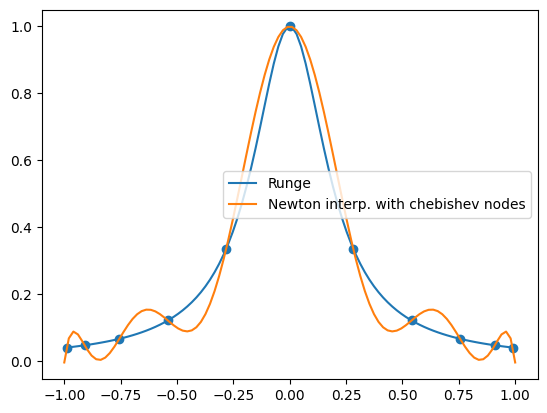

In [ ]:
n = 11
# first way 
# k = np.arange(1, n + 1)
# points = np.cos((np.pi * (2*k - 1)) / (2 * n))

# second way
points = np.array([np.cos((np.pi * (2*i - 1)) / (2 * n)) for i in range(1, n+1)])

plt.plot(interval, f(interval), label="Runge")
plt.plot(interval, newton_poly(points, f(points), interval), label="Newton interp. with chebishev nodes")
plt.scatter(points, f(points))
plt.legend()
plt.show()

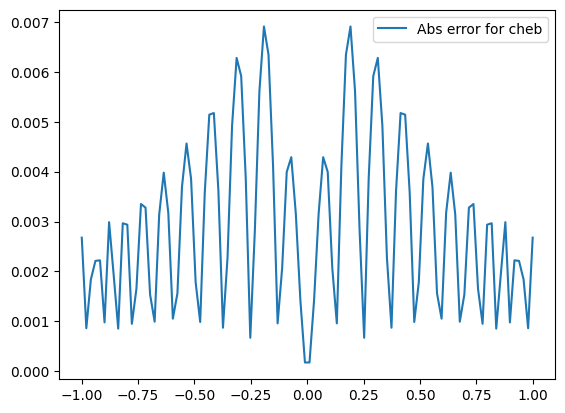

In [39]:
plt.plot(interval, abs_err(points), label="Abs error for cheb")
plt.legend()
plt.show()

### Задача 6

Проведени са експерименти за определяне бързодействието на един алгоритъм за сортиране в зависимост от броя входни елементи. Резултатите са представени в следната таблица:


| Брой елементи (x1000) | 10 | 20 | 50 | 100 | 150 | 200 | 250 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Време (сек.) | 0.163928 | 0.53282 | 3.00007 | 11.2078 | 26.7487 | 47.3297 | 76.8061 |

Да се определи приблизително колко елемента могат да се сортират за 30 сек.

In [ ]:
import sympy
import numpy as np

# data
nodes = np.array([10, 20, 50, 100, 150, 200, 250])
values = np.array([0.163928, 0.53282, 3.00007, 11.2078, 26.7487, 47.3297, 76.80616])

x = sympy.symbols('x')

# assume newton_poly() returns a sympy expression
# we give value like f(x) = 30, x=?
Eq = sympy.Eq(newton_poly(nodes, values, x), 30)
solutions = sympy.solve(Eq, x)

# keep only real, nonnegative solutions
filtered = [s for s in solutions if s.is_real and s >= 0]
print(filtered)

[158.463887410145]
